In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
data=pd.read_csv('./master.csv')
print(data.shape)
print(data.dtypes)

(27820, 12)
country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


In [3]:
data.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


How many countries data we have?

In [4]:
countries=data['country'].unique().tolist()
len(countries)

101

how many years of data we have?

In [5]:
years=data['year'].unique().tolist()
len(years)

32

range of years

In [6]:
print(min(years)," to ",max(years))

1985  to  2016


printing data of particular country.

In [7]:
hist_country = 'United States'
mask = data['country'].str.contains(hist_country)

stage = data[mask]

In [8]:
stage.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [9]:
stage2={}
for i in range(1985,2016):
   # hist_year = i
    mask = stage['year']==i
    stage2[i]=stage[mask]


In [10]:
suicides={}
for i in range(1985,2016):
    suicides[i]=stage2[i]['suicides_no'].sum()
    
suicides

{1985: 29446,
 1986: 30892,
 1987: 30783,
 1988: 30388,
 1989: 30218,
 1990: 30895,
 1991: 30790,
 1992: 30471,
 1993: 31084,
 1994: 31123,
 1995: 31272,
 1996: 30879,
 1997: 30517,
 1998: 30558,
 1999: 29183,
 2000: 29343,
 2001: 30607,
 2002: 31645,
 2003: 31477,
 2004: 32428,
 2005: 32629,
 2006: 33292,
 2007: 34596,
 2008: 36030,
 2009: 36900,
 2010: 38362,
 2011: 39508,
 2012: 40596,
 2013: 41143,
 2014: 42769,
 2015: 44189}

In [11]:
len(suicides)

31

bar chart representing suicides in united states

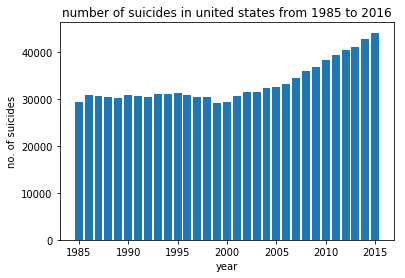

In [12]:
years = stage['year'].values
su = list(suicides.keys())
ci = list(suicides.values())

plt.bar(su,ci)

plt.xlabel('year')
plt.ylabel('no. of suicides')
plt.title('number of suicides in united states from 1985 to 2016')
plt.show()


using graph to represent data

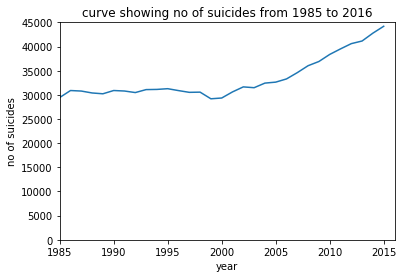

In [13]:
plt.plot(su,ci)
plt.axis([1985, 2016,0,45000])
plt.xlabel('year')
plt.ylabel('no of suicides')
plt.title('curve showing no of suicides from 1985 to 2016')
plt.show()

using scatter plot to represent data

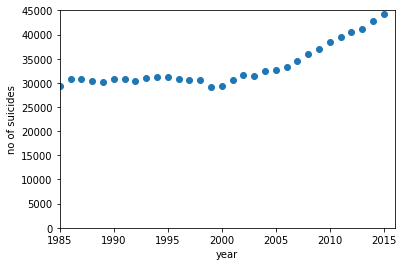

In [14]:
fig, axis = plt.subplots()
#axis.scatter(su,ci)
plt.axis([1985, 2016,0,45000])
axis.set_xlabel('year')
axis.set_ylabel('no of suicides')
axis.scatter(su,ci)
plt.show()

In [15]:
stage3={}
hist_sexm = 'male'
hist_sexf = 'female'

mask1 = stage['sex'].str.contains(hist_sexm)
mask2 = stage['sex'].str.contains(hist_sexf)

stage3['male'] = stage[mask1]
stage3['female']=stage[mask2]

stage3['male'].head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [16]:
nums={}
nums['male'] = stage3['male']['suicides_no'].sum()
nums['female'] = stage3['female']['suicides_no'].sum()
nums

{'male': 1034013, 'female': 213797}

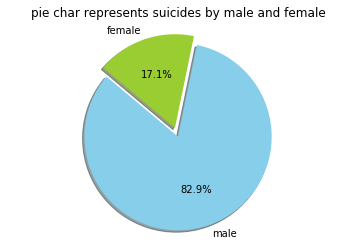

In [17]:
labels = 'male','female'
sizes = [1034013,213797]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0) 
 
plt.pie(sizes, labels=labels, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('pie char represents suicides by male and female')
 
plt.axis('equal')
plt.show()